In [41]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import json
import scipy.stats as stats

In [42]:
from stats import mean

ModuleNotFoundError: No module named 'stats'

In [3]:
# File to load 
Los_Angeles_df = "LA_Crime_Data.csv"

In [4]:
# Read the Los Angeles city crime data

Los_Angeles_df = pd.read_csv(Los_Angeles_df)

# Display the data table for preview
Los_Angeles_df.head()

,Date Occurred,LocationLat,LocationLong
0,7/15/2018,34.0547,-118.2505
1,7/14/2018,34.0516,-118.2561
2,7/14/2018,34.0663,-118.2441
3,5/19/2018,34.0472,-118.2351
4,7/14/2018,34.0510,-118.2480


In [5]:
Los_Angeles_df.dtypes

Date Occurred     object
LocationLat      float64
LocationLong     float64
dtype: object

In [6]:
Los_Angeles_df["Date Occurred"]=Los_Angeles_df["Date Occurred"].astype("datetime64")

In [7]:
Los_Angeles_df.head()

,Date Occurred,LocationLat,LocationLong
0,2018-07-15,34.0547,-118.2505
1,2018-07-14,34.0516,-118.2561
2,2018-07-14,34.0663,-118.2441
3,2018-05-19,34.0472,-118.2351
4,2018-07-14,34.0510,-118.2480


In [8]:
Los_Angeles_df_winter=len(Los_Angeles_df.loc[((Los_Angeles_df["Date Occurred"]>= "2018-01-01")& 
                                            (Los_Angeles_df["Date Occurred"] <="2018-03-20")) |
                                             (Los_Angeles_df["Date Occurred"]>="2018-12-21")])

print(Los_Angeles_df_winter)                                              

54474


In [9]:
Los_Angeles_df_spring=len(Los_Angeles_df.loc[(Los_Angeles_df["Date Occurred"]>= "2018-03-21")& 
                                            (Los_Angeles_df["Date Occurred"] <="2018-06-20")])
print(Los_Angeles_df_spring)

58342


In [10]:
Los_Angeles_df_summer=len(Los_Angeles_df.loc[(Los_Angeles_df["Date Occurred"]>= "2018-06-21")& 
                                            (Los_Angeles_df["Date Occurred"] <="2018-09-21")])
print(Los_Angeles_df_summer)

58052


In [11]:
Los_Angeles_df_fall=len(Los_Angeles_df.loc[(Los_Angeles_df["Date Occurred"]>= "2018-09-22")& 
                                            (Los_Angeles_df["Date Occurred"] <="2018-12-20")])
print(Los_Angeles_df_fall)

55194


In [12]:
print(f"Winter: {Los_Angeles_df_winter}")
print(f"Spring: {Los_Angeles_df_spring}")
print(f"Summer: {Los_Angeles_df_summer}")
print(f"Fall: {Los_Angeles_df_fall}")

Winter: 54474
Spring: 58342
Summer: 58052
Fall: 55194


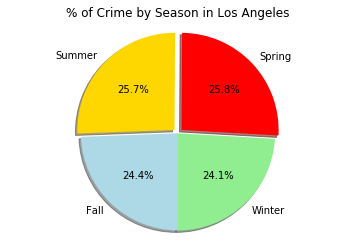

In [18]:
# Build Pie Chart
Seasons = ["Winter", "Spring", "Summer", "Fall"]
Crime = [Los_Angeles_df_winter, Los_Angeles_df_spring, Los_Angeles_df_summer, Los_Angeles_df_fall ]
colors = ["lightgreen", "red", "gold", "lightblue"]
explode = [0,0.05,0.05,0]
plt.pie(Crime, explode=explode, labels=Seasons, colors=colors, autopct="%1.1f%%", shadow=True, startangle=270)
plt.axis("equal")
plt.title("% of Crime by Season in Los Angeles")
# Save Figure
plt.savefig("LACrimebySeason.png")
# Show Figure
plt.show()


Text(0, 0.5, '# of Crime')

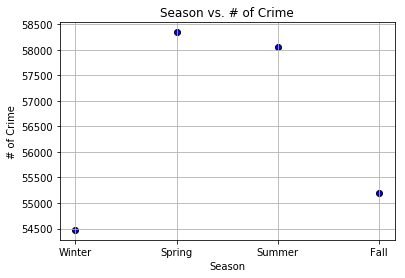

In [19]:
seasons = ["Winter", "Spring", "Summer", "Fall"]
crime = [Los_Angeles_df_winter, Los_Angeles_df_spring, Los_Angeles_df_summer, Los_Angeles_df_fall]

# Use matplotlib to create a scatter plot based upon the above data
plt.scatter(seasons, crime, marker="o", facecolors="blue", linewidth=1, edgecolors="black")

# Create a title, x label, and y label for our chart
title = f"Season vs. # of Crime"
plt.title(title)
plt.grid(True)
plt.xlabel("Season")
plt.ylabel("# of Crime")

In [20]:
#Chi^2 
observed = pd.Series([54474,58342,58052,55194], index=["Winter", "Spring", "Summer", "Fall"])

In [21]:
# Create a data frame
df = pd.DataFrame([observed]).T

# Add a column whose default values are the expected values
df[1] = 56516

# Rename columns
df.columns = ["observed", "expected"]

# View the data frame
df

,observed,expected
Winter,54474,56516
Spring,58342,56516
Summer,58052,56516
Fall,55194,56516


In [24]:
# The degree of freedom is 4-1 = 3
# With a p-value of 0.05, the confidence level is 1.00-0.05 = 0.95.
critical_value = stats.chi2.ppf(q = 0.95, df = 3)

In [25]:
# The critical value
critical_value

7.814727903251179

In [26]:
# Run the chi square test with stats.chisquare()
stats.chisquare(df['observed'], df['expected'])

Power_divergenceResult(statistic=205.4465991931488, pvalue=2.806894212014122e-44)

# Conclusion: since the chi square value of 205.45 exceeds the critical value of 7.81, we conclude that the results are statistically significant.

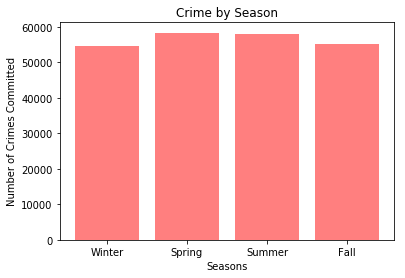

In [20]:
#Build bar and line chat
#show crime by season and high and low temp by season 
#x-axis is for seasons 
Crimes = [54474,58342,58052,55194]
x_axis = np.arange(len(Crimes))

#y-axis is for crimes committed
plt.bar(x_axis, Crimes, color='r', alpha=0.5, align="center")

# Tell matplotlib where we would like to place each of our x axis headers
Crimes = [value for value in x_axis]
plt.xticks(Crimes, ["Winter", "Spring", "Summer", "Fall"])

# Give our chart some labels and a tile
plt.title("Crime by Season")
plt.xlabel("Seasons")
plt.ylabel("Number of Crimes Committed")

# Save Figure
plt.savefig("CrimebyseasonBar.png")
# Show Figure
plt.show()

In [43]:
# Read the Los Angeles city temperature data
LATemp_df = "LATemp.csv"
LATemp_df = pd.read_csv(LATemp_df)

# Display the data table for preview
LATemp_df.head(12)

,Month,Highest Temperature,Lowest Temperature
0,January,70,52
1,February,73,55
2,March,70,52
3,April,73,55
4,May,75,58
5,June,79,62
6,July,83,65
7,August,84,66
8,September,83,65
9,October,79,60


In [23]:
LATemp_df.dtypes

Month                   object
Highest Temperature      int64
Lowest Temperature       int64
dtype: object

In [38]:
LATemp_df_winter = [70, 73, 70]
print(f"Mean January Months: {mean(LATemp_df_winter)}")


NameError: name 'mean' is not defined

In [ ]:
#High and low temperature by season 
High = [39, 42, 51, 62, 72, 82, 86, 84, 77, 65, 55, 44]
Low = [(x-32) * 0.56 for x in points_F]
points_C

In [ ]:
# Create a handle for each plot
fahrenheit, = plt.plot(x_axis, points_F, marker="+",color="blue", linewidth=1, label="Fahreneit")
celcius, = plt.plot(x_axis, points_C, marker="s", color="Red", linewidth=1, label="Celcius")

In [ ]:
#heatmap
#crime by season for LA

1.summer months (June 21- Sept 21)


2.fall months (Sept 22 - Dec 20)


3.winter months (Dec 21 - March 20)


4.spring months (March 21- June 20)


2.weather highs


1.average over the year for each city


2.plot on the same heat map


3.weather lows


1.average over the year for each



